 import necessary libraries


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter , CoxPHFitter
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

In [5]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

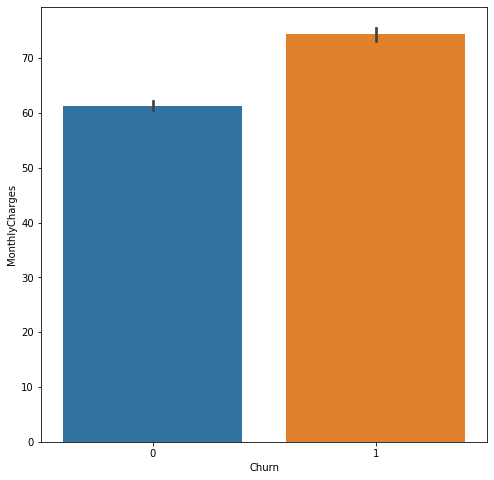

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='Churn',y='MonthlyCharges')

Text(0, 0.5, 'Survival probability')

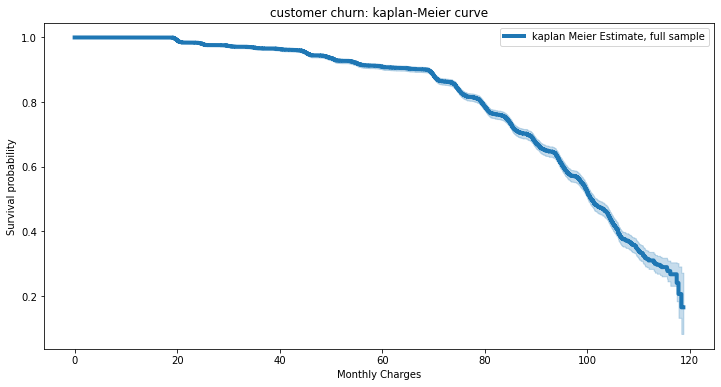

In [13]:
#plotting the kaplan-meier curve
kmf=KaplanMeierFitter()
kmf.fit(df.MonthlyCharges,df.Churn,label='kaplan Meier Estimate, full sample')
kmf.plot(linewidth=4,figsize=(12,6))
plt.title('customer churn: kaplan-Meier curve')
plt.xlabel('Monthly Charges')
plt.ylabel('Survival probability')

You can see as Monthly charges increases Survival Probability decreases 
So we can See how customers are churning due to monthly charges.

In [18]:
df1=df[df['TotalCharges']!=' ']

In [19]:
df1['TotalCharges']=df1['TotalCharges'].astype('float64')

Text(0, 0.5, 'Survival probability')

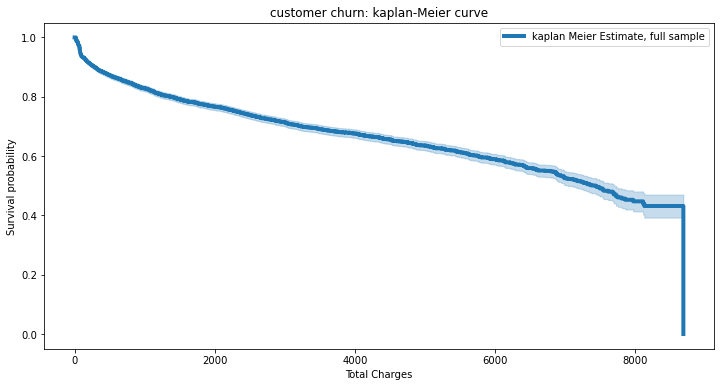

In [21]:
#plotting the kaplan-meier curve
kmf=KaplanMeierFitter()
kmf.fit(df1.TotalCharges,df1.Churn,label='kaplan Meier Estimate, full sample')
kmf.plot(linewidth=4,figsize=(12,6))
plt.title('customer churn: kaplan-Meier curve')
plt.xlabel('Total Charges')
plt.ylabel('Survival probability')

In this curve also you can see that Survival Probability is going down as Total Charge increases.

In [22]:
df1.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

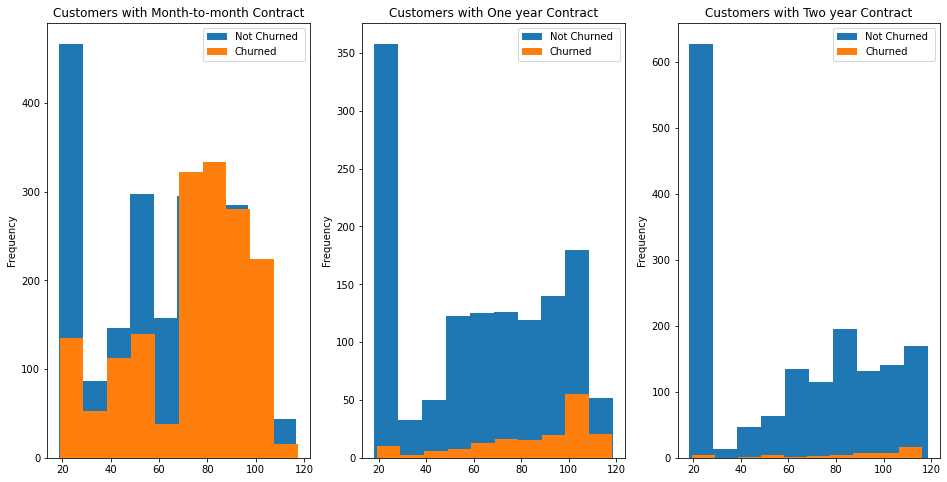

In [24]:
# examin the varibale
df3=df1[df1.Contract=='Month-to-month']
df4=df1[df1.Contract=='One year']
df5=df1[df1.Contract=='Two year']
fig,ax=plt.subplots(1,3,figsize=(16,8))
df3.groupby('Churn')['MonthlyCharges'].plot(kind='hist',ax=ax[0],title='Customers with Month-to-month Contract')
ax[0].legend(labels=['Not Churned ','Churned'])
df4.groupby('Churn')['MonthlyCharges'].plot(kind='hist',ax=ax[1],title='Customers with One year Contract')
ax[1].legend(labels=['Not Churned ','Churned'])
df5.groupby('Churn')['MonthlyCharges'].plot(kind='hist',ax=ax[2],title='Customers with Two year Contract')
ax[2].legend(labels=['Not Churned ','Churned'])


As we can see that if contract is month to month means for less time then cutomer is churning rapidly but if contract is for more time then we can see that customers are not churning.

Text(0, 0.5, 'Survival Probabiltiy')

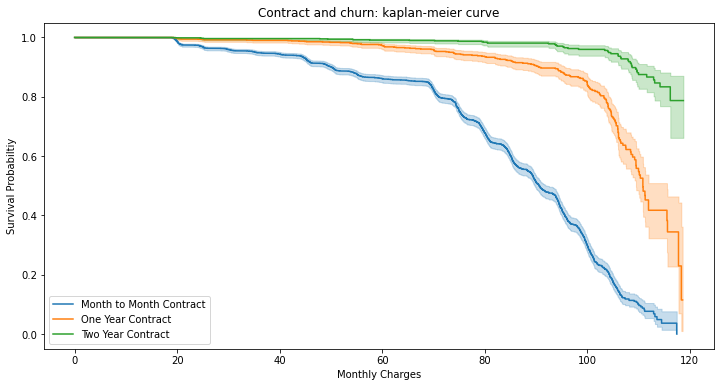

In [28]:
ax=plt.axes()
kmf.fit(df3.MonthlyCharges,df3.Churn,label='Month to Month Contract')
kmf.plot(figsize=(12,6),ax=ax)
kmf.fit(df4.MonthlyCharges,df4.Churn,label='One Year Contract')
kmf.plot(figsize=(12,6),ax=ax)
kmf.fit(df5.MonthlyCharges,df5.Churn,label='Two Year Contract')
kmf.plot(figsize=(12,6),ax=ax)
plt.title('Contract and churn: kaplan-meier curve')
plt.xlabel('Monthly Charges')
plt.ylabel('Survival Probabiltiy')

As you can see in the above curve that survival proability is more for Two Year Contract and less than that for One year andvery less for month to month.

# Cox PHfitter

In [37]:
dfd=df1[['Contract','MonthlyCharges','TotalCharges','Churn']]

In [38]:
dfd['Contract']=dfd['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2})

<AxesSubplot:>

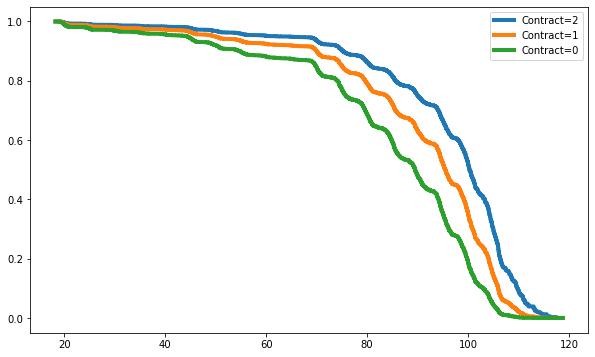

In [40]:
cph=CoxPHFitter()
cph.fit(dfd,duration_col='MonthlyCharges',event_col='Churn')
cph.plot_partial_effects_on_outcome('Contract',[2,1,0],plot_baseline=False,figsize=(10,6),lw=4)

Ploted survival probability based on Contract,Monthly Chrges, Total Charges then analyze that how contract is affecting survival probability.

In [41]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'MonthlyCharges'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13039.08
         time fit was run = 2022-05-31 13:42:58 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Contract      -0.47       0.63       0.07            -0.60            -0.34                 0.55                 0.71
TotalCharges  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

               cmp to      z      p   -log2(p)
covariate                                     
Contract         0.00  -7.14 <0.005      39.98
TotalCharges     0.00 -31.38 <0.005     715.75
---
Concordance = 0.86
Partial AIC = 26082.17
log-likelihood ratio test = 2760.22 on 2 df
-log2(p) of ll-ratio test = inf

In [43]:
df1['PaymentMethod'].value_countsounts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [45]:
dfu=df1[['PaymentMethod','Contract','MonthlyCharges','TotalCharges','Churn']]
dfu['PaymentMethod']=dfu['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
dfu['Contract']=dfu['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2})
cph.fit(dfu,duration_col='MonthlyCharges',event_col='Churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'MonthlyCharges'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13039.07
         time fit was run = 2022-05-31 13:58:36 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
PaymentMethod   0.00       1.00       0.02            -0.04             0.05                 0.96                 1.05
Contract       -0.47       0.62       0.07            -0.60            -0.34                 0.55                 0.71
TotalCharges   -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                cmp to      z      p   -log2(p)
covariate                                      
PaymentMethod     0.00   0.18   0.86       0.22
Contract          0.00  -7.10 <0.005      39.59
TotalCharges      0.00 -31.12 <0.005     703.76
---
Concordance = 0.86
Partial AIC = 26084.14
log-likelihood ratio test = 2760.25 on 3 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

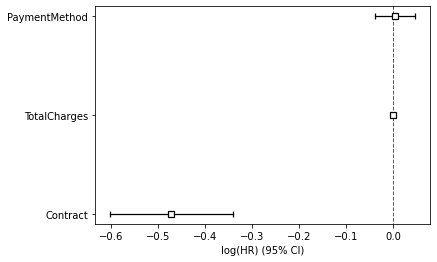

In [46]:
cph.plot()

<AxesSubplot:>

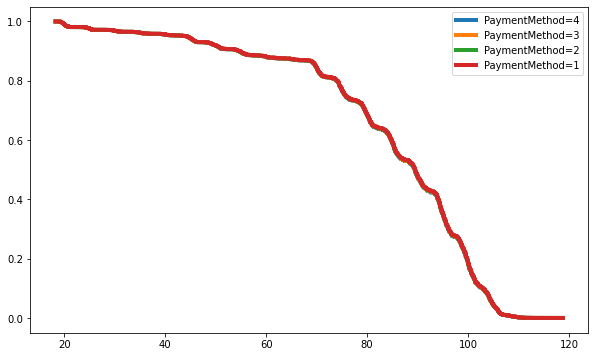

In [48]:
cph.plot_partial_effects_on_outcome('PaymentMethod',[4,3,2,1],plot_baseline=False,figsize=(10,6),lw=4)

See all the payment mehods affecting Survival probability equally.